In [1]:
from tensorflow.keras.datasets.cifar10 import load_data

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
import matplotlib.pyplot as plt

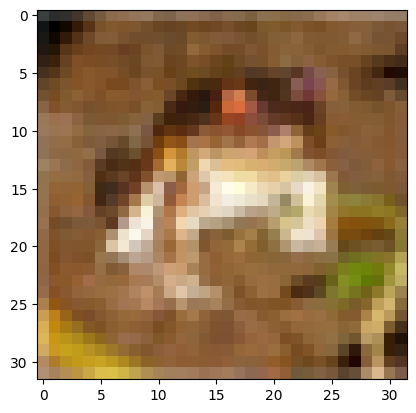

In [7]:
plt.imshow(x_train[0])

In [8]:
y_train[0]

array([6], dtype=uint8)

0 : airplane

1 : automobile

2 : bird

3 : cat

4 : deer

5 : dog

6 : frog

7 : horse

8 : ship

9 : truck

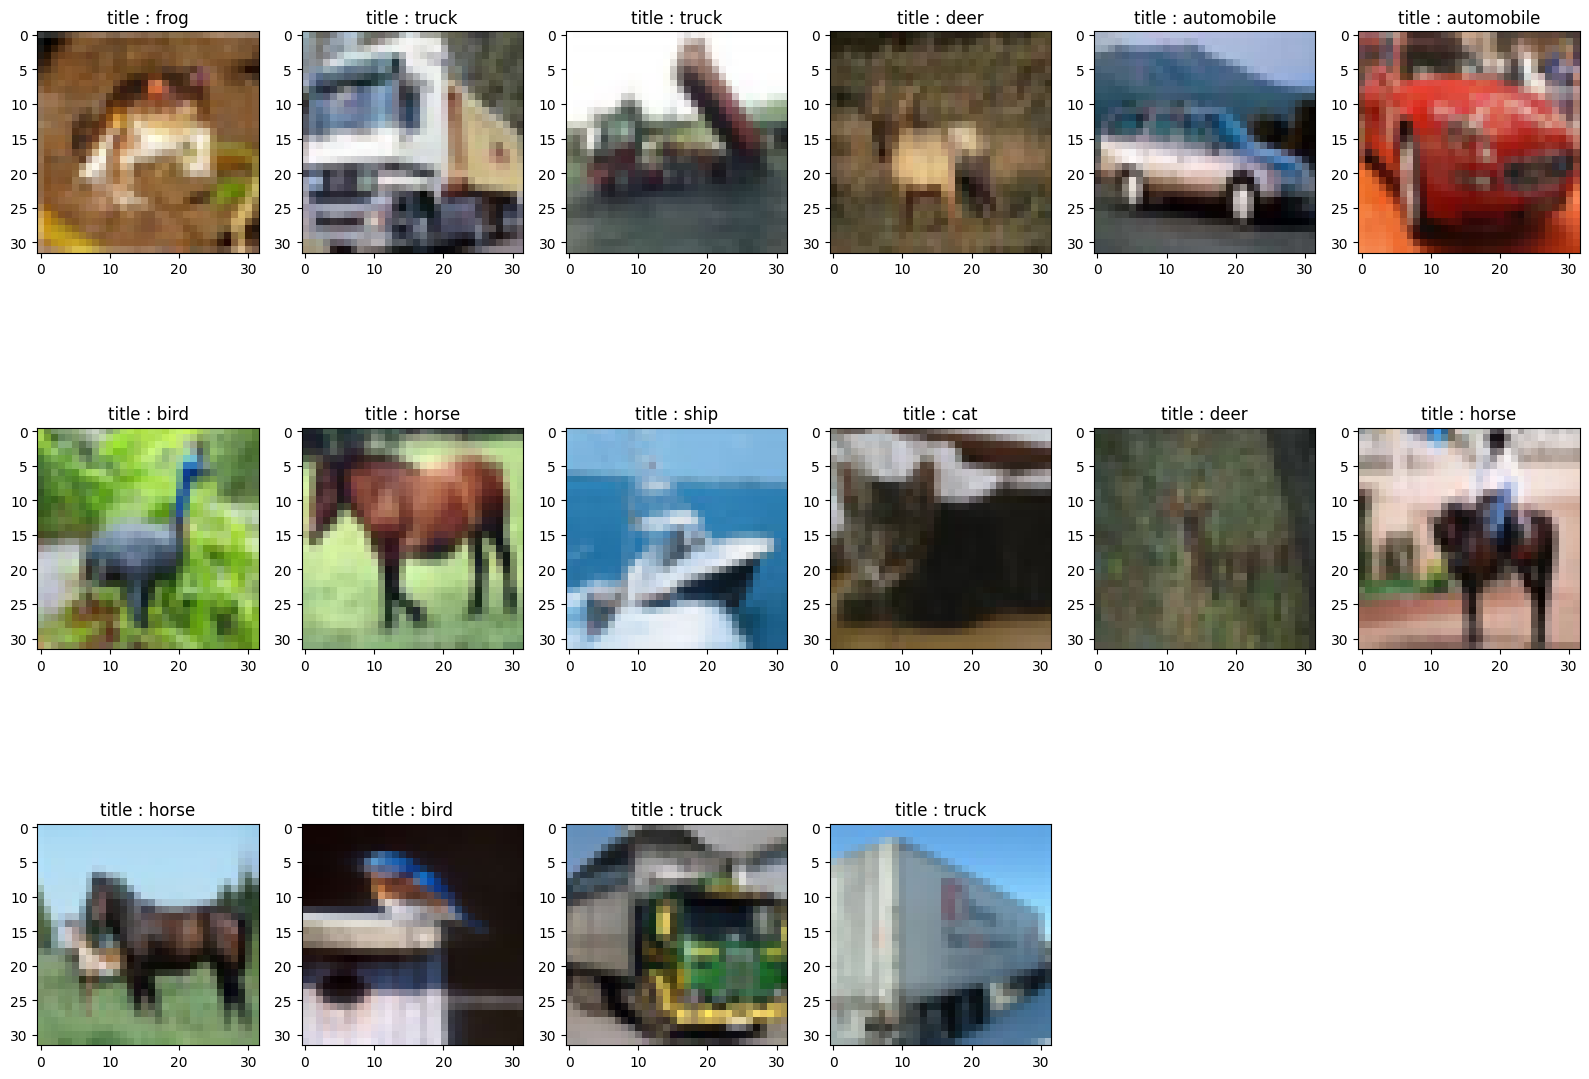

In [10]:
cifar10_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(16, 16))

for idx, sample in enumerate(x_train[:16]):
    plt.subplot(4, 6, idx+1)
    plt.imshow(sample)
    plt.title(f"title : {cifar10_names[y_train[idx][0]]}")

plt.tight_layout()
plt.show()

In [11]:
# CNN을 이용하여 학습하고 모델 평가 해보자.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from time import time
import numpy as np
import matplotlib.pyplot as plt
import random

In [12]:
x_train_scale, x_test_scale = x_train / 255.0, x_test / 255.0

In [13]:
print(x_train_scale.shape, y_train.shape)
print(x_test_scale.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(32, input_shape=(32, 32, 3), kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2차원으로 변형하자
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

/Users/handaeseong/dev/data-engineer/miniconda3/envs/multi02_tensor/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# 컴파일
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [19]:
start_time = time()

result = model.fit(x_train_scale, y_train, epochs=10, batch_size=100, validation_split=0.3)
print(f"fit time : {time() - start_time}")

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - acc: 0.2980 - loss: 1.9030 - val_acc: 0.4842 - val_loss: 1.4234
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - acc: 0.5049 - loss: 1.3659 - val_acc: 0.5414 - val_loss: 1.3029
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - acc: 0.5801 - loss: 1.1794 - val_acc: 0.6097 - val_loss: 1.1173
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - acc: 0.6348 - loss: 1.0463 - val_acc: 0.6410 - val_loss: 1.0325
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - acc: 0.6693 - loss: 0.9408 - val_acc: 0.6617 - val_loss: 0.9781
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - acc: 0.6977 - loss: 0.8721 - val_acc: 0.6589 - val_loss: 0.9712
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - acc: 0.7226 - loss: 0.7935 - val_acc: 0.6801 - val_loss: 0.9261
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - acc: 0.7467 - loss: 0.7278 - val_acc: 0.6849 - val_loss: 0.9148
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 681,440 (2.60 MB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 454,294 (1.73 MB)

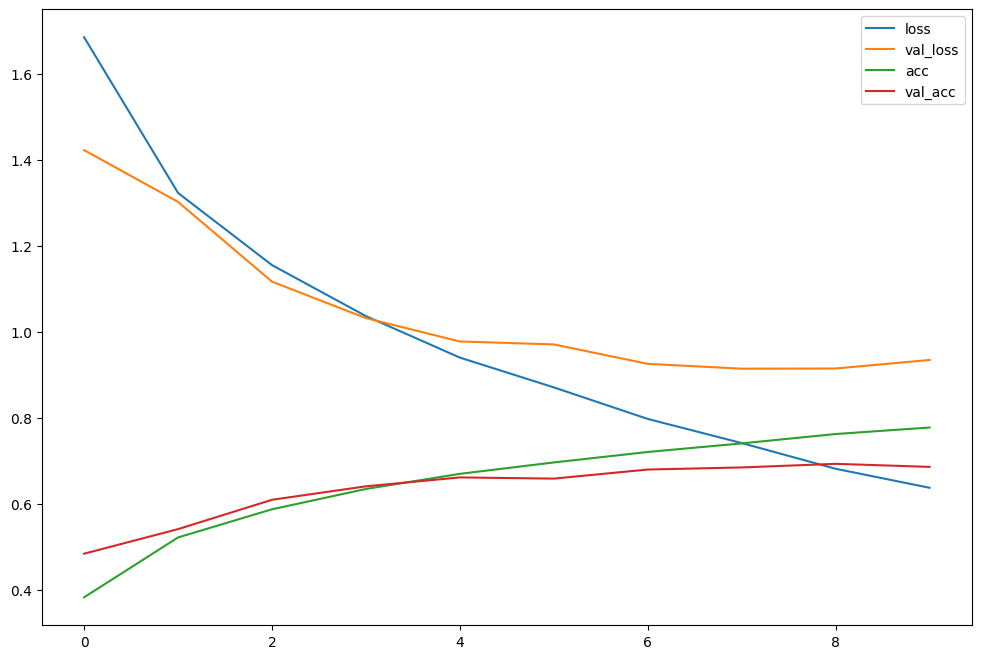

In [21]:
plot_target = ["loss", "val_loss", "acc", "val_acc"]

plt.figure(figsize=(12, 8))

for target in plot_target:
    plt.plot(result.history[target], label=target)

plt.legend()
plt.show()

In [22]:
model.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6887 - loss: 0.9246


[0.9366371035575867, 0.6841999888420105]

In [26]:
prodict = model.predict(x_test_scale)
predict_label = np.argmax(prodict, axis=1)

print(y_test)
print(prodict_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[3 1 8 ... 5 4 7]


In [27]:
wrong_predict = list()

for i in range(len(y_test)):
    if predict_label[i] !=y_test[i]:
        wrong_predict.append(i)

print(len(wrong_predict))

3158


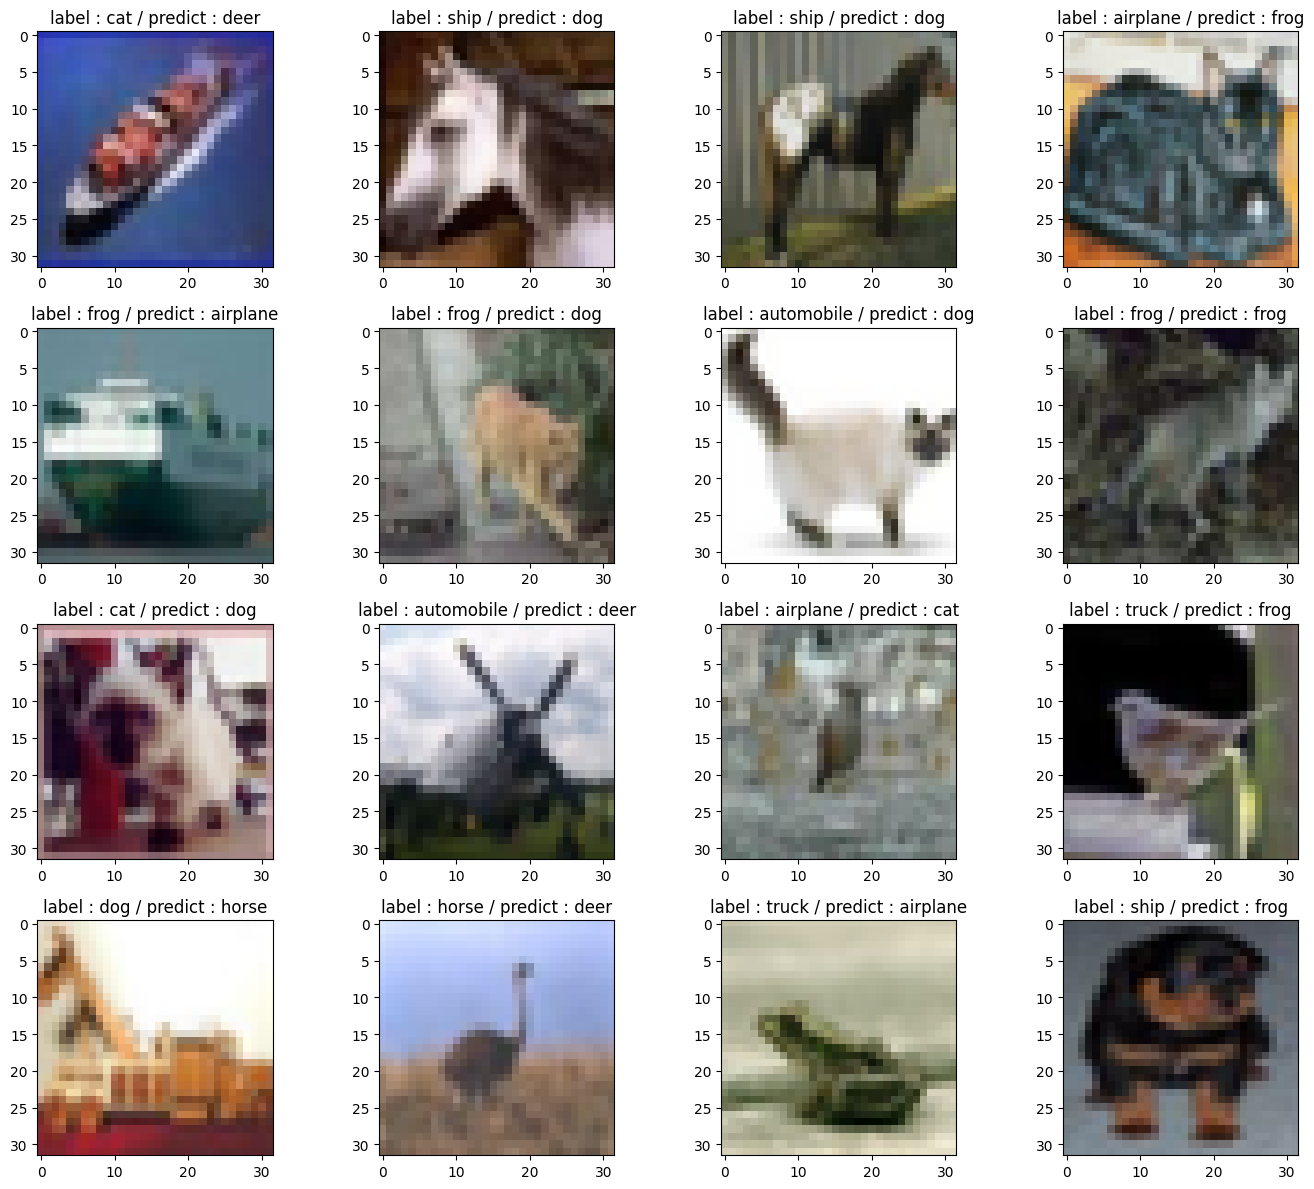

In [39]:
samples = random.choices (population=wrong_predict, k=16)

plt.figure(figsize=(14, 12))

for idx, sample in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[sample].reshape(32, 32, 3), cmap="Greys")
    plt.title(f"label : {cifar10_names[y_test[idx][0]]} / predict : {cifar10_names[predict_label[sample]]}")

plt.tight_layout()
plt.show()